<a href="https://colab.research.google.com/github/le-kag/Quantum/blob/main/Quantum_computation_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Computation 

####  Author: Nshuti Chris Kagabe

# 1. Qubits, Bloch Sphere and Basis States

In [ ]:
pip install qiskit

In [ ]:
pip install pylatexenc

In [6]:
import qiskit
import numpy as np
import matplotlib
import pylatexenc
qiskit.__qiskit_version__

{'qiskit': None,
 'qiskit-aer': '0.7.3',
 'qiskit-aqua': '0.8.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-ignis': '0.5.1',
 'qiskit-terra': '0.16.3'}



\begin{align}
|\psi \rangle = \begin{pmatrix}
\alpha \\ \beta
\end{pmatrix}, \quad \text{where } \sqrt{\langle \psi | \psi \rangle} = 1. 
\end{align}

Think of Qubit as an Electron:

\begin{align}
\text{spin-up}: \ |0\rangle &= \begin{pmatrix} 1\\0 \end{pmatrix} \\
\text{spin-down}: \ |1\rangle & = \begin{pmatrix} 0\\1 \end{pmatrix}
\end{align}

In [16]:
from qiskit import *
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram

In [17]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell + meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 491, '11': 509}


Types of visualization:

'plot_state_city': The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city.

'plot_state_qsphere': The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different 'qsphere' for each component.

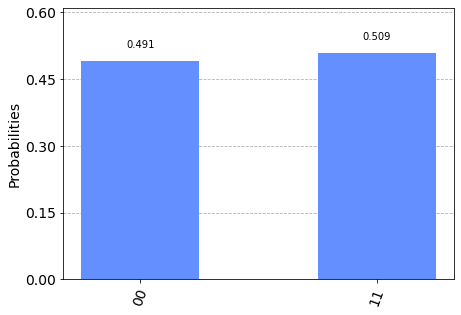

In [18]:
plot_histogram(counts)

In [19]:
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(bell, backend).result()
psi  = result.get_statevector(bell)

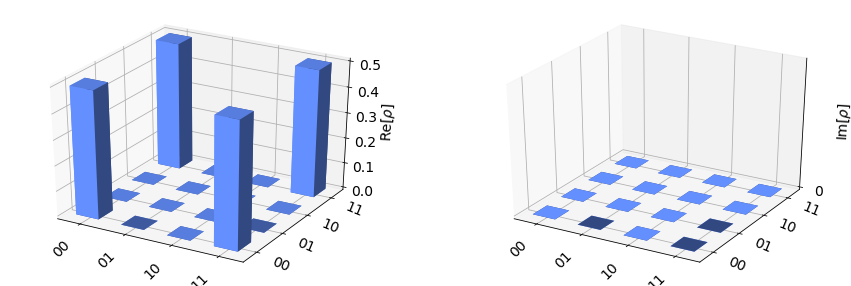

In [20]:
plot_state_city(psi)

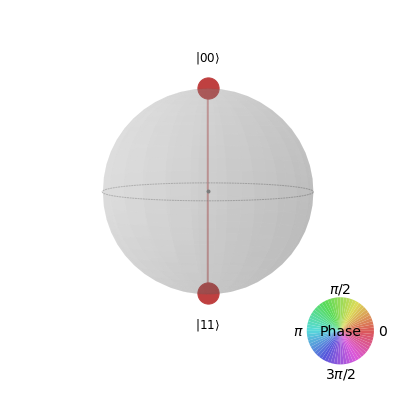

In [21]:
plot_state_qsphere(psi)

Another representation is via Bloch Sphere:

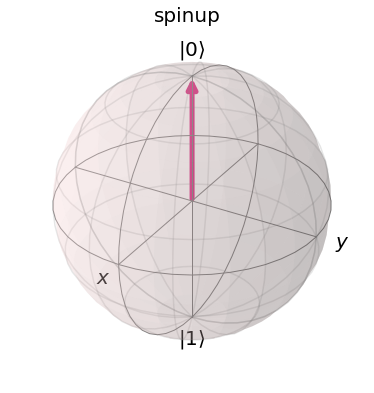

In [22]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector([0,0,1], title = 'spinup')

## Spin + / - :

\begin{align}
\text{spin +}: \ |+\rangle &= \begin{pmatrix} 1/\sqrt{2} \\ 1/\sqrt{2} \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) \\
\text{spin -}: \ |-\rangle & = \begin{pmatrix} 1/\sqrt{2} \\ -1/\sqrt{2} \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right)
\end{align}

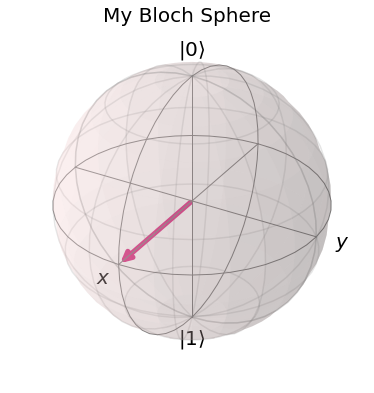

In [23]:
plot_bloch_vector([1,0,0], title='My Bloch Sphere')

## Basis States


\begin{align}
 |0\rangle &= \begin{pmatrix} 1\\0 \end{pmatrix} \\
 |1\rangle & = \begin{pmatrix} 0\\1 \end{pmatrix}
\end{align}
Preapring other states from Basis States:
\begin{align}
|00 \rangle &= |0\rangle \otimes |0\rangle = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix} = \begin{pmatrix} 1\\0\\0\\0 \end{pmatrix} \\
|01 \rangle &= |0\rangle \otimes |1\rangle = \begin{pmatrix} 1\\0 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix} = \begin{pmatrix} 0\\1\\0\\0 \end{pmatrix} \\
|10 \rangle &= |1\rangle \otimes |0\rangle = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 1\\0 \end{pmatrix} = \begin{pmatrix} 0\\0\\1\\0 \end{pmatrix} \\
|11 \rangle &= |1\rangle \otimes |1\rangle = \begin{pmatrix} 0\\1 \end{pmatrix} \otimes \begin{pmatrix} 0\\1 \end{pmatrix} = \begin{pmatrix} 0\\0\\0\\1 \end{pmatrix}
\end{align}

In [24]:
ket_zero = np.array([[1],[0]])
ket_one = np.array([[0],[1]])

In [25]:
np.kron(ket_one, ket_zero)

array([[0],
       [0],
       [1],
       [0]])




# Quantum Gates and Circuits

In [26]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector

## Pauli Matrices

\begin{align}
I = \begin{pmatrix} 1&0 \\ 0&1 \end{pmatrix}, \quad
X = \begin{pmatrix} 0&1 \\ 1&0 \end{pmatrix}, \quad
Y = \begin{pmatrix} 0&i \\ -i&0 \end{pmatrix}, \quad
Z = \begin{pmatrix} 1&0 \\ 0&-1 \end{pmatrix} \quad
\end{align}

## X-gate

The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

Effect a gate has on a qubit: 

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$


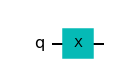

In [27]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

In [28]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc, backend).result().get_statevector()
print(out)

[0.+0.j 1.+0.j]


## Z & Y-Gate



$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$




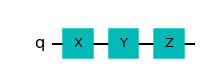

In [29]:
# Do Y-gate on qubit 0
qc.y(0)
# Do Z-gate on qubit 0
qc.z(0)

qc.draw('mpl')


## Hadamard Gate



$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

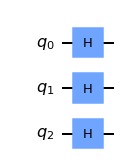

In [30]:
#create circuit with three qubit
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

## Identity Gate



$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$



$$ I = XX $$



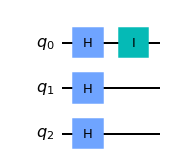

In [31]:
qc.i(0)

qc.draw('mpl')

 ** Other Gates: S-gate , T-gate, U-gate





# Multiple Qubits, Entanglement

## Multiple Qubits

The state of two qubits :

$$ |psi\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

In [32]:
from qiskit import *

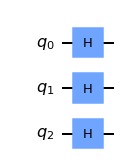

In [33]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw('mpl')

Each qubit is in the state $|+\rangle$, so we should see the vector:

$$ 
|{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$

In [34]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
print(out)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


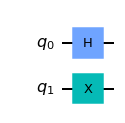

In [35]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')



$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

The operation looks like this:

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

Which we can then apply to our 4D statevector $|q_1 q_0\rangle$. You will often see the clearer notation:

$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

## C-Not Gate

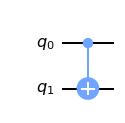

In [36]:
#create circuit with two qubit
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw('mpl')

Classical truth table of C-Not gate:

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |



## Entanglement

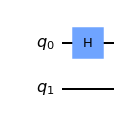

In [37]:
#create two qubit circuit
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [38]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc, backend).result().get_statevector()
print(final_state)

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


Quantum System Sate is:

$$
|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$


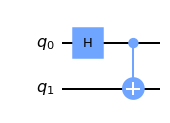

In [39]:

# Apply H-gate to the first:

# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [40]:
# Let's see the result:
final_state = execute(qc,backend).result().get_statevector()
print(final_state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


We see we have this final state (Bell State):

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 



Other Bell States:





# Bernstein-Vazirani Algorithm




A black-box function $f$, which takes as input a string of bits ($x$), and returns either $0$ or $1$, that is:







$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1  $$ 

The function is guaranteed to return the bitwise product of the input with some string, $s$. 


In other words, given an input $x$, $f(x) = s \cdot x \, \text{(mod 2)} =\ x_0 * s_0+x_1*s_1+x_2*s_2+...\ $ mod 2

The quantum Bernstein-Vazirani Oracle:
    
1. Initialise the inputs qubits to the $|0\rangle^{\otimes n}$ state, and output qubit to $|{-}\rangle$.
2. Apply Hadamard gates to the input register
3. Query the oracle
4. Apply Hadamard gates to the input register
5. Measure

## Example Two Qubits:

<ol>
    <li> The register of two qubits is initialized to zero:
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

 
   </li>

   <li> For the string $s=11$, the quantum oracle performs the operation:
$$
|x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle. 
$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$

 
   </li>

   <li> Measure to find the secret string $s=11$
   </li>


</ol>


In [41]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [42]:
s = 101011

In [43]:
qc = QuantumCircuit(6+1, 6 )
qc.h([0,1,2,3,4,5])

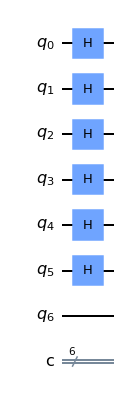

In [44]:
qc.draw('mpl')

In [45]:
qc = QuantumCircuit(6+1, 6)
qc.h([0,1,2,3,4,5])

qc.x(6)
qc.h(6)

qc.barrier()

qc.cx(5, 6)
qc.cx(3, 6)
qc.cx(1, 6)
qc.cx(0, 6)

qc.barrier()

qc.h([0,1,2,3,4,5])

qc.measure([0,1,2,3,4,5], [0,1,2,3,4,5])

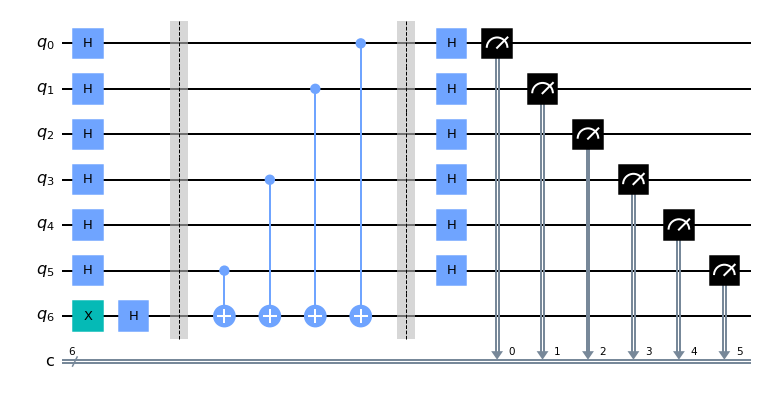

In [46]:
qc.draw('mpl')

In [47]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots =1).result()
counts = result.get_counts()

print(counts)

{'101011': 1}
